<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


## Hands on Lab


Import the pandas module.


In [1]:
import pandas as pd

In [4]:
%pip install seaborn

In [5]:
import seaborn as sns

Load the dataset into a dataframe.


<h2>Read Data</h2>
<p>
We utilize the <code>pandas.read_csv()</code> function for reading CSV files. However, in this version of the lab, which operates on JupyterLite, the dataset needs to be downloaded to the interface using the provided code below.
</p>


The functions below will download the dataset into your browser:


In [6]:
from pyodide.http import pyfetch

async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())

In [7]:
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv"

To obtain the dataset, utilize the download() function as defined above:  


In [8]:
await download(file_path, "m2_survey_data.csv")
file_name="m2_survey_data.csv"

Utilize the Pandas method read_csv() to load the data into a dataframe.


In [9]:
df = pd.read_csv(file_name)

> Note: This version of the lab is working on JupyterLite, which requires the dataset to be downloaded to the interface.While working on the downloaded version of this notebook on their local machines(Jupyter Anaconda), the learners can simply **skip the steps above,** and simply use the URL directly in the `pandas.read_csv()` function. You can uncomment and run the statements in the cell below.


In [10]:
#df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


In [11]:
import matplotlib.pyplot as plt
import numpy as np
get_ipython().run_line_magic('matplotlib', 'inline')

In [13]:
df.dropna(subset=['ConvertedComp'], axis=0, inplace=True)
df['ConvertedComp'].value_counts().head(10)

2000000.0    138
1000000.0    105
100000.0      99
150000.0      92
120000.0      86
110000.0      83
70000.0       81
130000.0      77
90000.0       77
80000.0       73
Name: ConvertedComp, dtype: int64

<ipython-input-14-134d69d974e9>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['ConvertedComp'], hist=False, color='b')


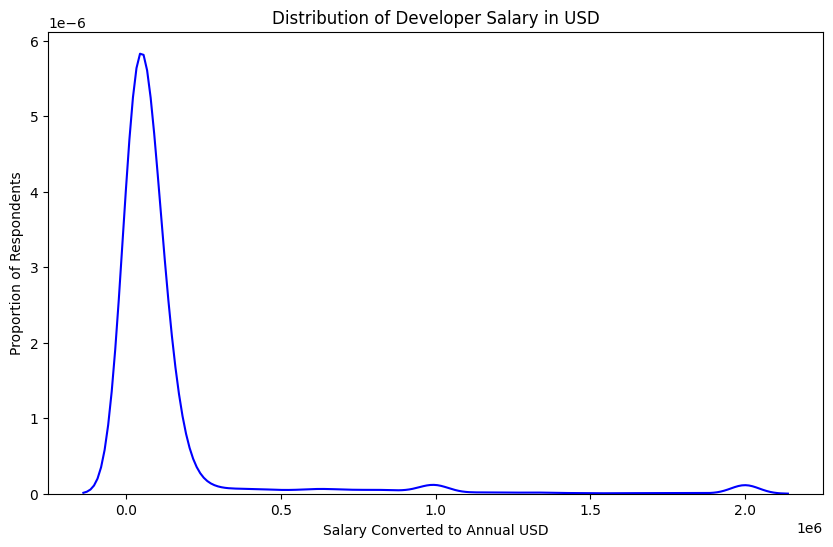

In [14]:
plt.figure(figsize=(10,6))
sns.distplot(df['ConvertedComp'], hist=False, color='b')
plt.title('Distribution of Developer Salary in USD')
plt.xlabel('Salary Converted to Annual USD')
plt.ylabel('Proportion of Respondents')
plt.show()
plt.close()

Plot the histogram for the column `ConvertedComp`.


[9659  238  115  125   99  131   34   15   15  151]
[      0.  200000.  400000.  600000.  800000. 1000000. 1200000. 1400000.
 1600000. 1800000. 2000000.]


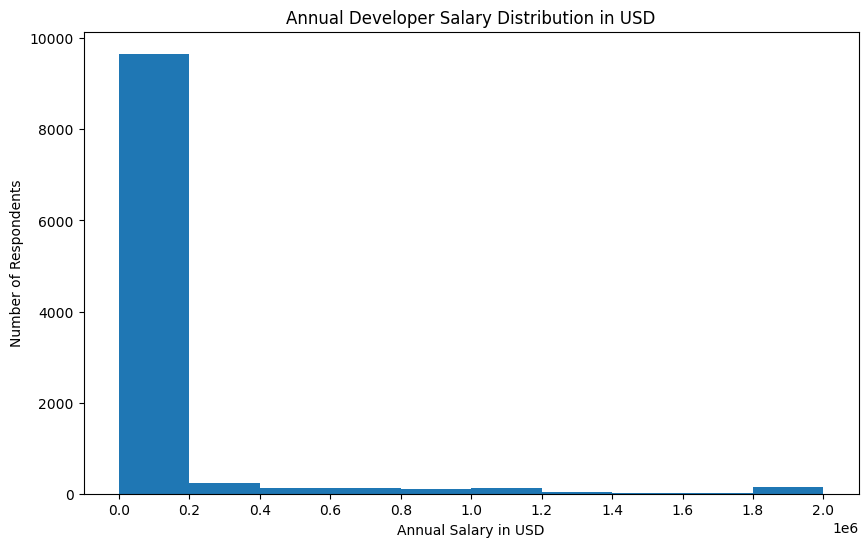

In [17]:
# your code goes here
count, bin_edges = np.histogram(df['ConvertedComp'])
print(count)
print(bin_edges)

df['ConvertedComp'].plot(kind='hist', figsize=(10,6), xticks= bin_edges)
plt.title('Annual Developer Salary Distribution in USD')
plt.xlabel('Annual Salary in USD')
plt.ylabel('Number of Respondents')
plt.show()

What is the median of the column `ConvertedComp`?


In [18]:
# your code goes here
df['ConvertedComp'].median()

57745.0

How many responders identified themselves only as a **Man**?


In [19]:
# your code goes here
df[df['Gender']=='Man'].shape[0]

9725

Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [20]:
# your code goes here
df['ConvertedComp'][df['Gender'] == 'Woman'].median()

57708.0

Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [21]:
# your code goes here
df.dropna(subset=['Age'], axis=0, inplace=True)
df['Age'].describe()

count    10354.000000
mean        30.833040
std          7.389983
min         16.000000
25%         25.000000
50%         29.000000
75%         35.000000
max         99.000000
Name: Age, dtype: float64

Plot a histogram of the column `Age`.


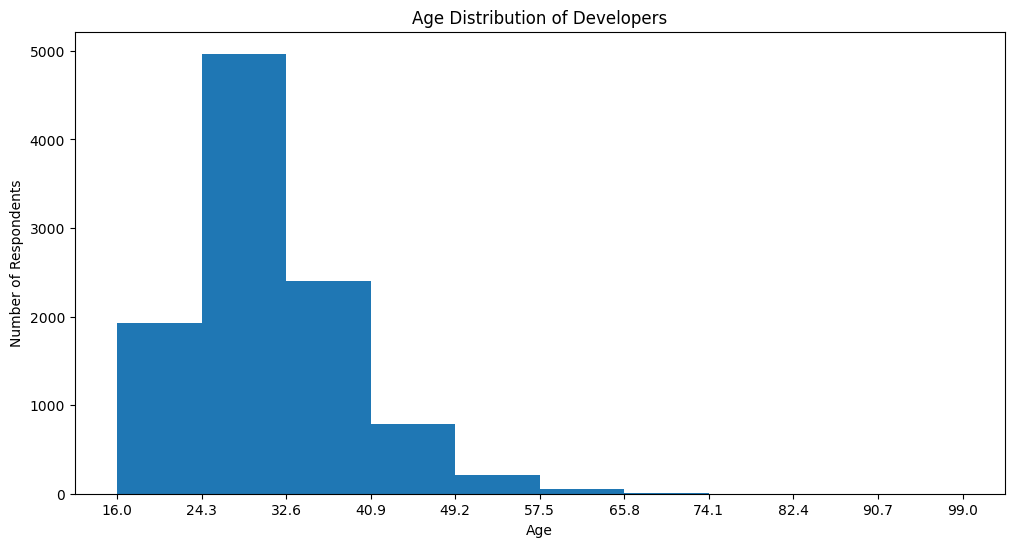

In [22]:
# your code goes here
count, bin_edges = np.histogram(df['Age'])
df['Age'].plot(kind='hist', figsize=(12,6), xticks=bin_edges)
plt.title('Age Distribution of Developers')
plt.xlabel('Age')
plt.ylabel('Number of Respondents')
plt.show()

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


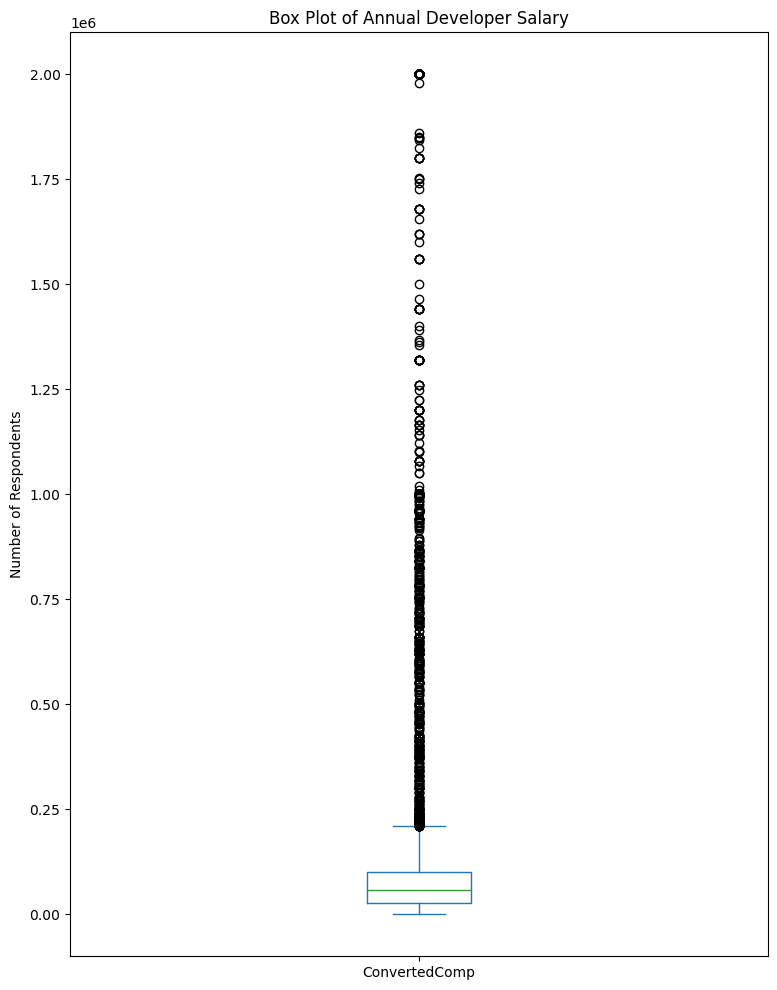

In [23]:
# your code goes here
df['ConvertedComp'].plot(kind='box', figsize=(9,12))
plt.title('Box Plot of Annual Developer Salary')
plt.ylabel('Number of Respondents')
plt.show()

Find out the Inter Quartile Range for the column `ConvertedComp`.


In [25]:
# your code goes here
df['ConvertedComp'].describe()
IQR = df['ConvertedComp'].describe()[6] - df['ConvertedComp'].describe()[4]
IQR

73165.5

Find out the upper and lower bounds.


In [26]:
# your code goes here
IQR_V = 1.5 * IQR
lower_bound = df['ConvertedComp'].describe()[4] - IQR_V
upper_bound = df['ConvertedComp'].describe()[6] + IQR_V

print('Lower Bound: ', lower_bound)
print('Upper Bound: ', upper_bound)

Lower Bound:  -82913.75
Upper Bound:  209748.25


Identify how many outliers are there in the `ConvertedComp` column.


In [29]:
# your code goes here
df[(df['ConvertedComp'] > upper_bound) | (df['ConvertedComp'] < lower_bound)].shape[0]

861

Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [31]:
# your code goes here
df_new = df[df['ConvertedComp'] <= upper_bound]

## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


<ipython-input-32-93740fa5f58a>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df_new.corr()


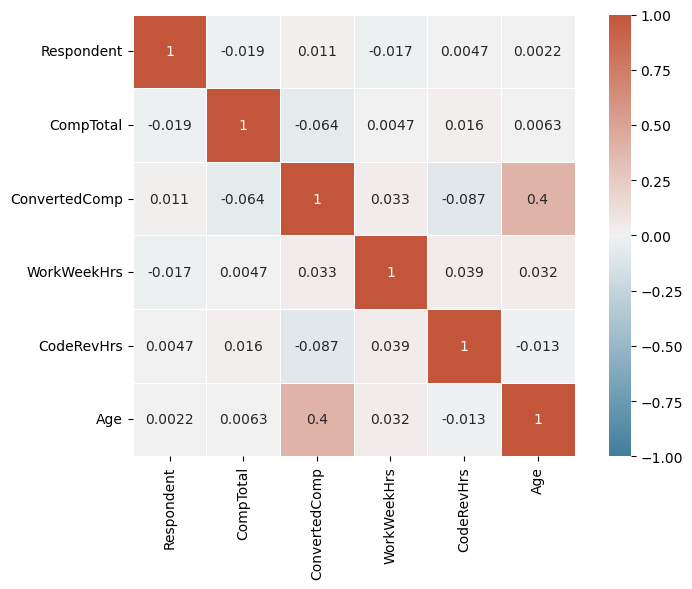

In [32]:
# your code goes here
corr = df_new.corr()
cmap = sns.diverging_palette(230, 20, as_cmap=True)
plt.figure(figsize=(8,6))
sns.heatmap(corr, cmap=cmap, annot=True, center=0, vmin=-1, square=True, linewidths=0.5)
plt.tight_layout()
plt.show()

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
